In [31]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
from mlyzed import Lyze
from mlyzed.utils import diffusion_coefficient

In [25]:
calc = Lyze()
traj = calc.read_file('/Users/artemdembitskiy/Desktop/projects/ngpo_paper/ngpo_mlip_trajs/trajs_no_vac_size_14g/md1000_232.lammpstrj')

Unwrapping coordinates: 100%|██████████| 2101/2101 [00:00<00:00, 36509.23it/s]


In [42]:
dt, msd = calc.classical_msd(
                            specie = 'H',  # specie of interest
                            timestep=2000, # in fs
                            skip = 200     # skip first 200 steps
                            )

D: 3.5e-06 cm^2/s


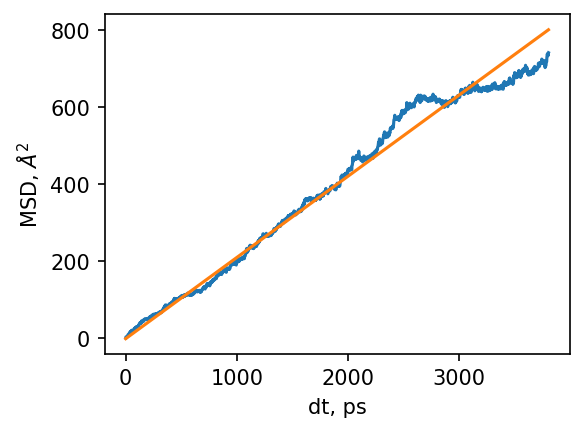

In [45]:
plt.figure(dpi = 150, figsize = (4, 3))
plt.plot(dt, msd)
plt.xlabel('dt, ps')
plt.ylabel('MSD, $\AA^{2}$')

dt_, msd_ = calc._get_range(dt, msd, (0, 2000))
res = linregress(dt_, msd_)

plt.plot(dt, res.slope * dt + res.intercept)

print('D:', diffusion_coefficient(res.slope).round(7), 'cm^2/s')